In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pop_data = pd.read_csv('scprc-est2014-18+pop-res.csv')
pop_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
0,10,0,0,0,United States,318857056,245273438,76.9
1,40,3,6,1,Alabama,4849377,3741806,77.2
2,40,4,9,2,Alaska,736732,550189,74.7
3,40,4,8,4,Arizona,6731484,5109792,75.9
4,40,3,7,5,Arkansas,2966369,2259350,76.2


In [3]:
ozone_data = pd.read_csv('Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv')
ozone_data.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
0,2011,27DEC2011,40,40115,4.011557e+10,36.83417,-94.89017,30.760628,6.040485
1,2011,27DEC2011,40,40115,4.011557e+10,36.72375,-94.86795,30.991293,6.130745
2,2011,27DEC2011,40,40115,4.011557e+10,36.76596,-94.68712,30.654421,6.135627
3,2011,27DEC2011,40,40117,4.011796e+10,36.29091,-96.47541,32.095710,5.330798
4,2011,27DEC2011,40,40117,4.011796e+10,36.20644,-96.36062,32.202291,5.214895


In [4]:
ozone_data["year"].unique()

array([2011, 2012])

In [5]:
statefips_data = pd.read_csv('us-state-ansi-fips.csv')
statefips_data.head(15)

,stname,st,stusps
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA
5,Colorado,8,CO
6,Connecticut,9,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


In [7]:
statefips_data.columns = ['State', 'statefips', 'abrv']
statefips_data

,State,statefips,abrv
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA
5,Colorado,8,CO
6,Connecticut,9,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


In [8]:
len(ozone_data["statefips"].unique())

49

In [9]:
states = ozone_data["statefips"].unique()
states.sort()
states

array([ 1,  4,  5,  6,  8,  9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [26]:
yearly_ozone_average = ozone_data[["year", "statefips", "ds_o3_pred"]].groupby(["year", "statefips"]).mean()
yearly_ozone_average = yearly_ozone_average.reset_index()
yearly_ozone_average = yearly_ozone_average.merge(statefips_data, how = 'inner', on = ['statefips'])
yearly_ozone_average['ozone concentration'] =  yearly_ozone_average['ds_o3_pred']
yearly_ozone_average = yearly_ozone_average.drop('ds_o3_pred', axis = 1)
yearly_ozone_average

,year,statefips,State,abrv,ozone concentration
0,2011,1,Alabama,AL,33.036676
1,2012,1,Alabama,AL,30.911511
2,2011,4,Arizona,AZ,22.993041
3,2012,4,Arizona,AZ,30.742179
4,2011,5,Arkansas,AR,34.476832
...,...,...,...,...,...
93,2012,54,West Virginia,WV,27.630166
94,2011,55,Wisconsin,WI,21.278201
95,2012,55,Wisconsin,WI,25.476341
96,2011,56,Wyoming,WY,36.797850


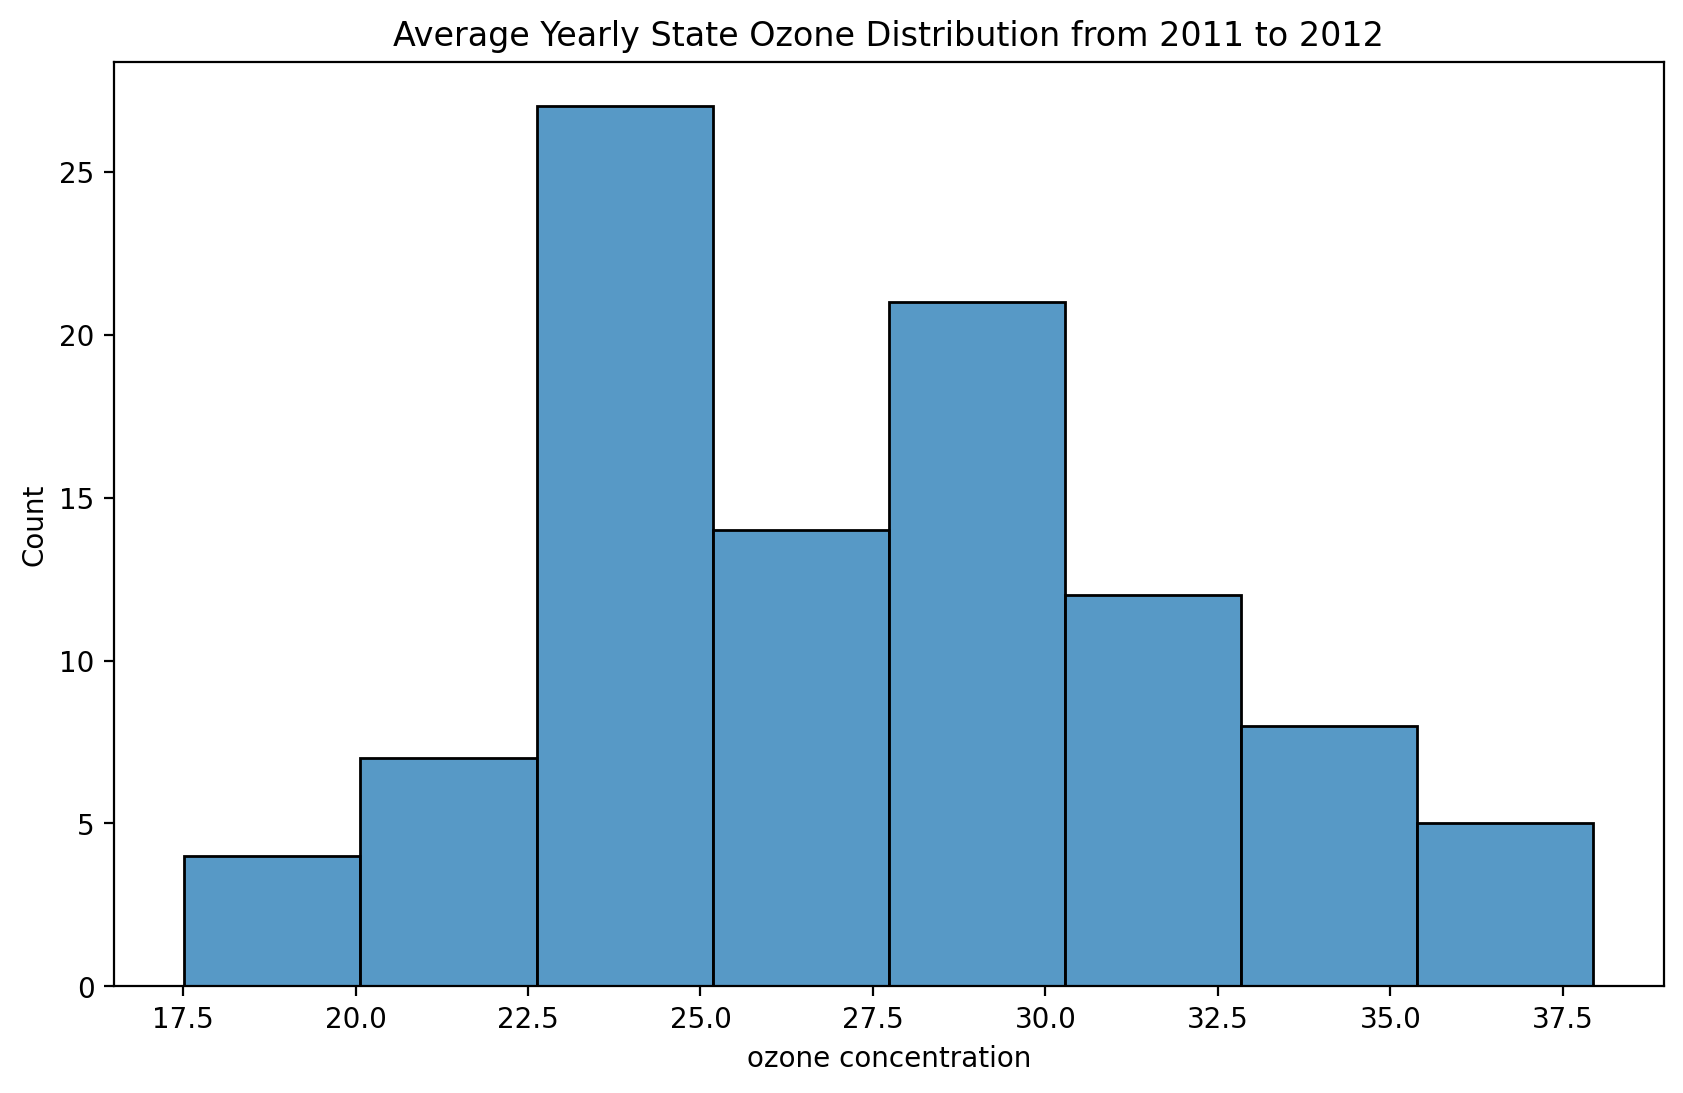

In [28]:
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(data =yearly_ozone_average,  x = "ozone concentration" )
plt.title("Average Yearly State Ozone Distribution from 2011 to 2012");

plt.savefig('Average_Ozone_Distribution_2011-2012.jpg')

In [1]:
pip install nbzip

Note: you may need to restart the kernel to use updated packages.


In [4]:
jupyter serverextension enable --py nbzip --sys-prefix
jupyter nbextension install --py nbzip
jupyter nbextension enable --py nbzip

SyntaxError: invalid syntax (2773800776.py, line 1)